In [1]:
# Data management
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  
from datetime import datetime as dt

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder


In [2]:
casino = pd.read_csv("Online_casino_DIB.csv")
casino.head()

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-07-05T05:02:28+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
1,2019-07-05T05:26:00+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
2,2019-07-05T04:54:35+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
3,2019-07-05T05:02:27+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
4,2019-07-05T05:25:59+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734


In [ ]:
casino.dtypes

ReqTimeUTC            object
TransactionType       object
TransactionAmount    float64
Status                object
AccountIdentifier     object
dtype: object

In [4]:
casino.ReqTimeUTC = pd.to_datetime(casino.ReqTimeUTC)

In [5]:
casino.describe(exclude = 'float64')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,138928,138928,138928,138928
unique,NaN,3,2,2361
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,70329,133520,2318
mean,2019-08-23 14:37:01.511898112+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-19 06:27:26.249999872+00:00,NaN,NaN,NaN
50%,2019-08-21 13:32:02.500000+00:00,NaN,NaN,NaN
75%,2019-11-23 20:28:33.500000+00:00,NaN,NaN,NaN
max,2020-03-02 07:47:06+00:00,NaN,NaN,NaN


In [6]:
casino = casino[casino.ReqTimeUTC <='2020-02-29 00:00:00+00:00'].copy()

In [7]:
casino.TransactionType.unique()

array(['LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL', 'LOYALTYCARDCREDIT'],
      dtype=object)

In [8]:

casino.TransactionType = casino.TransactionType.map({'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDITCL':'L1D', 'LOYALTYCARDCREDIT':'L2W'})

<Axes: xlabel='ReqTimeUTC', ylabel='Density'>

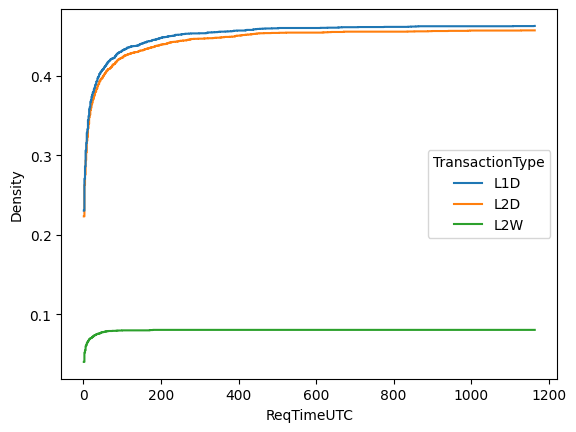

In [9]:
# Se agrupan las transacciones por tipo y usuario. Luego se grafica la distribución acumulativa con sns.histplot
user_type_ = casino.groupby(["AccountIdentifier", "TransactionType"]).count().reset_index()
# sns.histplot(data = user_type_, x="ReqTimeUTC", bins=50, hue = "TransactionType")

sns.histplot(data = user_type_, x="ReqTimeUTC", hue = "TransactionType", cumulative = True, stat="density", element="step", fill=False)

In [10]:
# Se identifican los 20 usuarios más frecuentes y los mayores gastadores, y se grafican.
top_20_freq = casino.groupby("AccountIdentifier").count().reset_index().iloc[:,0:2].sort_values("ReqTimeUTC")[::-1][0:20]
top_20_spenders = casino[["AccountIdentifier", "TransactionAmount"]].groupby("AccountIdentifier").sum().reset_index().sort_values("TransactionAmount")[::-1][0:20]
# top_20_spenders

<Axes: xlabel='TransactionAmount', ylabel='AccountIdentifier'>

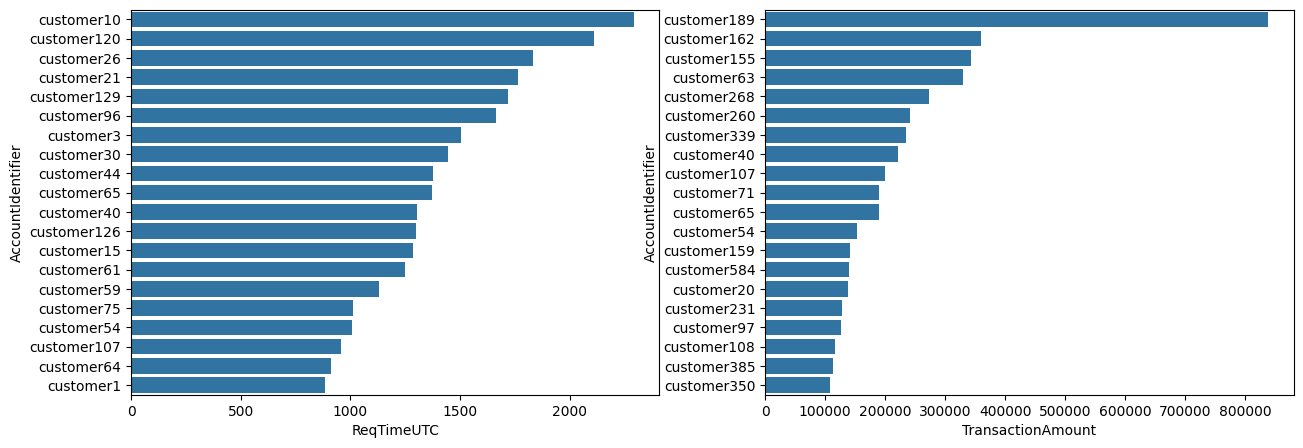

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

sns.barplot(top_20_freq, x = 'ReqTimeUTC', y = 'AccountIdentifier', ax = ax[0])
sns.barplot(top_20_spenders, x ="TransactionAmount", y = "AccountIdentifier", ax = ax[1])

In [12]:
# Se analiza la actividad por hora y día de la semana, visualizada con un heatmap.
casino["hour"] = casino.ReqTimeUTC.dt.hour
casino["day_of_week"] = casino.ReqTimeUTC.dt.day_of_week
day_of_week_dict = {0: "1_Monday", 1:"2_Tuesday", 2:"3_Wednesday", 3:"4_Thursday", 4:"5_Friday", 5:"6_Saturday", 6:"7_Sunday"}
casino["day_of_week"] = casino["day_of_week"].map(day_of_week_dict)
casino

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,hour,day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,5_Friday
2,2019-07-05 04:54:35+00:00,L1D,10.0,APPROVED,customer1734,4,5_Friday
3,2019-07-05 05:02:27+00:00,L1D,10.0,APPROVED,customer1734,5,5_Friday
4,2019-07-05 05:25:59+00:00,L1D,10.0,APPROVED,customer1734,5,5_Friday
...,...,...,...,...,...,...,...
138920,2019-11-01 06:51:05+00:00,L1D,30.0,APPROVED,customer1994,6,5_Friday
138924,2019-05-23 20:02:47+00:00,L1D,10.0,APPROVED,customer2215,20,4_Thursday
138925,2019-07-11 23:01:08+00:00,L1D,10.0,APPROVED,customer2215,23,4_Thursday
138926,2019-05-23 20:02:49+00:00,L2D,10.0,APPROVED,customer2215,20,4_Thursday


<Axes: xlabel='hour', ylabel='day_of_week'>

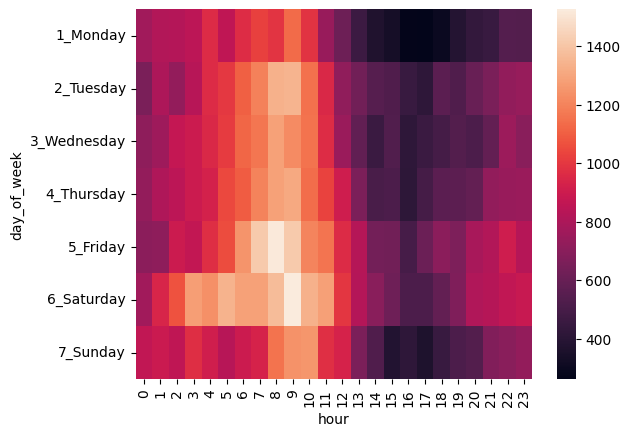

In [13]:
h_d_g = casino[["hour", "day_of_week", "TransactionType"]].groupby(["hour", "day_of_week"]).count().reset_index()
casino_hm = pd.pivot_table(h_d_g, values="TransactionType", index="day_of_week", columns="hour")
sns.heatmap(casino_hm)

In [14]:
#Registro completo de la actividad diaria por cliente, rellenando los días faltantes.
casino["ReqDateUTC"] = casino.ReqTimeUTC.dt.floor('D')

daily_activity = casino.groupby(["AccountIdentifier", "ReqDateUTC"]).agg({'TransactionAmount': 'sum', 'TransactionType':'count'})\
    .reset_index()

daily_activity

,AccountIdentifier,ReqDateUTC,TransactionAmount,TransactionType
0,customer1,2019-03-01 00:00:00+00:00,240.0,6
1,customer1,2019-03-02 00:00:00+00:00,250.0,4
2,customer1,2019-03-03 00:00:00+00:00,400.0,4
3,customer1,2019-03-04 00:00:00+00:00,320.0,6
4,customer1,2019-03-05 00:00:00+00:00,480.0,6
...,...,...,...,...
30575,customer996,2019-03-14 00:00:00+00:00,50.0,2
30576,customer996,2019-09-13 00:00:00+00:00,50.0,4
30577,customer997,2019-09-22 00:00:00+00:00,100.0,2
30578,customer998,2019-11-09 00:00:00+00:00,100.0,4


In [15]:
full_customer_df = pd.DataFrame()

for customer_id in daily_activity.AccountIdentifier.unique():
    customer_df = daily_activity[daily_activity.AccountIdentifier == customer_id]

    full_range = pd.date_range(customer_df.ReqDateUTC.min(), customer_df.ReqDateUTC.max(), freq="D")

    customer_df = customer_df.set_index(keys = "ReqDateUTC")

    customer_df = customer_df.reindex(list(full_range), fill_value=0)
    customer_df.AccountIdentifier = [customer_id]*len(customer_df)
    
    customer_df = customer_df.reset_index()
    full_customer_df = pd.concat([full_customer_df, customer_df])

full_customer_df = full_customer_df.reset_index(drop=True)

In [16]:
full_customer_df

,ReqDateUTC,AccountIdentifier,TransactionAmount,TransactionType
0,2019-03-01 00:00:00+00:00,customer1,240.0,6
1,2019-03-02 00:00:00+00:00,customer1,250.0,4
2,2019-03-03 00:00:00+00:00,customer1,400.0,4
3,2019-03-04 00:00:00+00:00,customer1,320.0,6
4,2019-03-05 00:00:00+00:00,customer1,480.0,6
...,...,...,...,...
173046,2019-09-12 00:00:00+00:00,customer996,0.0,0
173047,2019-09-13 00:00:00+00:00,customer996,50.0,4
173048,2019-09-22 00:00:00+00:00,customer997,100.0,2
173049,2019-11-09 00:00:00+00:00,customer998,100.0,4


In [17]:
#Analiza la actividad mensual de los clientes, incluyendo inicio y final de actividad.
full_customer_df['month']=full_customer_df.ReqDateUTC.dt.to_period("M")

customer_month=full_customer_df.groupby(['month','AccountIdentifier']).count().reset_index().iloc[:,:2]

star_ = customer_month.groupby('AccountIdentifier').min().reset_index()
end_ = customer_month.groupby('AccountIdentifier').max().reset_index() 

star_end_df =pd.merge(star_, end_, on='AccountIdentifier')

source_target_value  =star_end_df.groupby(['month_x','month_y']).count().reset_index()
source_target_value

/var/folders/mv/9jtv_q3s0gs6ndhpn_7nsv900000gq/T/ipykernel_1940/714437257.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_customer_df['month']=full_customer_df.ReqDateUTC.dt.to_period("M")


,month_x,month_y,AccountIdentifier
0,2019-03,2019-03,279
1,2019-03,2019-04,60
2,2019-03,2019-05,47
3,2019-03,2019-06,37
4,2019-03,2019-07,29
...,...,...,...
73,2019-12,2020-01,18
74,2019-12,2020-02,30
75,2020-01,2020-01,137
76,2020-01,2020-02,42


In [19]:
le= LabelEncoder()
le.fit_transform(source_target_value.month_x.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [21]:
fast_quiter = source_target_value[source_target_value.month_x == source_target_value.month_y]
source_target_value = source_target_value[source_target_value.month_x != source_target_value.month_y]

In [22]:
#clientes que depositaron todos los meses
tc_df = customer_month.groupby('month').count().reset_index()
tc_df

,month,AccountIdentifier
0,2019-03,768
1,2019-04,696
2,2019-05,730
3,2019-06,706
4,2019-07,695
5,2019-08,657
6,2019-09,619
7,2019-10,601
8,2019-11,580
9,2019-12,589


In [23]:
#Clientes que depositaron durante  un mes
fq_df = fast_quiter[['month_x','AccountIdentifier']] 
fq_df

,month_x,AccountIdentifier
0,2019-03,279
12,2019-04,90
23,2019-05,99
33,2019-06,81
42,2019-07,96
50,2019-08,85
57,2019-09,71
63,2019-10,67
68,2019-11,68
72,2019-12,92


In [24]:
#Compara clientes totales y los que abandonaron por mes.

monthly_metrics = pd.merge(tc_df, fq_df, right_on='month_x', left_on= 'month')[["month","AccountIdentifier_x","AccountIdentifier_y"]]
monthly_metrics.rename(columns= {"month":"month","AccountIdentifier_x":"total","AccountIdentifier_y":"quit"}, inplace=True)
monthly_metrics

,month,total,quit
0,2019-03,768,279
1,2019-04,696,90
2,2019-05,730,99
3,2019-06,706,81
4,2019-07,695,96
5,2019-08,657,85
6,2019-09,619,71
7,2019-10,601,67
8,2019-11,580,68
9,2019-12,589,92


<Axes: xlabel='month', ylabel='value'>

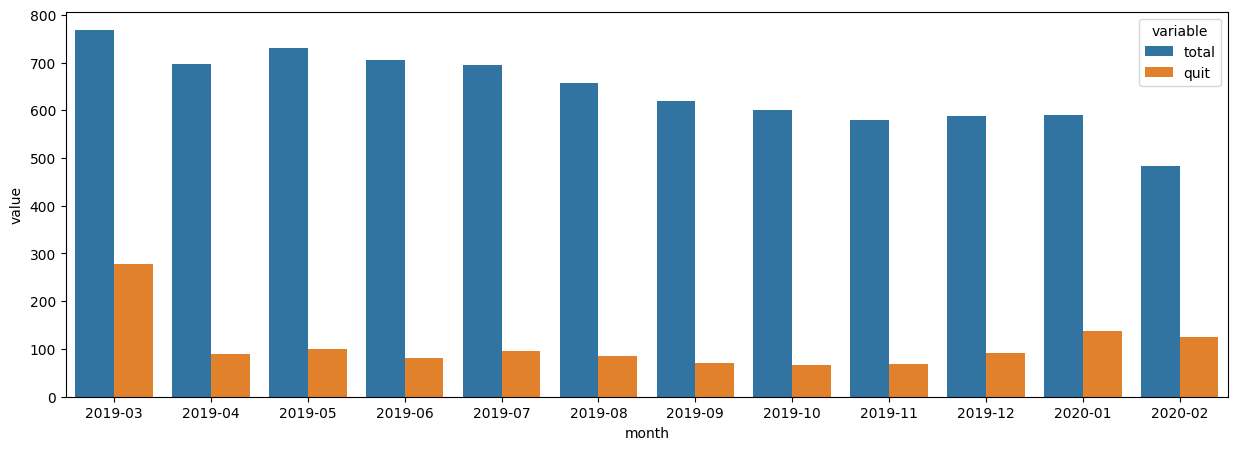

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(monthly_metrics.melt(id_vars = ["month"]), x = "month", y="value", hue = "variable")

In [ ]:
#Guardando DF para PowerBI
top_20_freq.to_csv('top_20_active_users.csv', index=False)
top_20_spenders.to_csv('top_20_high_spenders.csv', index=False)

In [27]:
h_d_g.to_csv('hour_day_grouped.csv',index=False)
full_customer_df.to_csv('daily_customer_data.csv',index=False)
star_end_df.to_csv('customer_lifetime.csv',index=False)
source_target_value.to_csv('customer_transitions.csv',index=False)
monthly_metrics.to_csv('monthly_metrics.csv',index=False)